### Clustering K-Means

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
class KMeansClustering:
    def __init__(self,k=3):
        self.k = k
        self.centroids = None
        
    @staticmethod
    def euclidean_distance(data_point, centroids):
            return np.sqrt(np.sum((centroids - data_point)**2,axis=1))

    def fit (self, X,max_iterations=200):
        self.centroids = np.random.uniform(np.amin(X,axis=0), np.amax(X, axis=0), size= (self.k, X.shape[1]))
        
        for _ in range(max_iterations):
            y= []
            
            for data_point in X:
                distances = KMeansClustering.euclidean_distance(data_point, self.centroids)
                cluster_num = np.argmin(distances)
                y.append(cluster_num)
            
            y = np.array(y)
            
            cluster_indices= []
            
            for i in range(self.k):
                cluster_indices.append(np.argwhere(y == i))
            
            cluster_centers= []
            
            for i, indices in enumerate(cluster_indices):
                if len(indices) ==0:
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices], axis=0)[0])
            
            if np.max(self.centroids - np.array(cluster_centers)) < 0.0001:
                break
            else:
                self.centroids = np.array(cluster_centers)
            return y

In [48]:
from sklearn.datasets import make_blobs

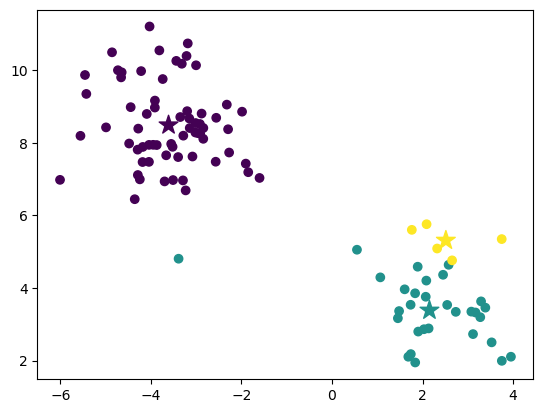

In [58]:
data = make_blobs(n_samples=100,n_features=2)
random_points = data[0]

kmeans = KMeansClustering(k=3)
labels = kmeans.fit(random_points)

plt.scatter(random_points[:,0],random_points[:,1],c=labels)
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1],c=range(len(kmeans.centroids)), marker = "*", s=200)

plt.show()
            